## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5.How many rows and columns are in gdp_df? What are the data types of each column?

In [6]:
##gdp_df.shape[0]---can use [0] to find amount of columns, [1] to find amount of rows. There's only two dimensions in this list.
##in same note- can use negatives to count backwards [-1] in this sense would be 3
##gdp.df.loc[0]['Country_Area']--go into column country or area and find the #1 row associated with 0 placement

In [7]:
gdp_df.shape

(7662, 4)

In [8]:
##get into practice of using .info() early on importing data to see columns/rows/data types/null values

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [10]:
##by putting in double square brackets- the outcome for this column will look like a dataframe and appear cleaner.
##Compare and contrast what it looks like with double vs single brackets

In [11]:
gdp_df[['Year']]

,Year
0,2021
1,2020
2,2019
3,2018
4,2017
...,...
7657,1994
7658,1993
7659,1992
7660,1991


6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df=gdp_df.drop(columns='Value Footnotes')

In [13]:
## not super encourages but another methond with same results is
## gdp_df.drop(gdp_df.columns[3], axis=1) --axis=1, references that its a column we're referencing, the [3] references the placement of the column

In [14]:
## to rename you can also just do gdp_df=columns['Country', 'GDP_Per_Capita', 'Year']
## but when doing that you need to make sure that you're putting in every single column or else column will be dropped OR will show error. 
## better to use rename function because you don't need to say ever column if you're not renaming all columns, and cleaner/makes more sense

In [15]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Year':'Year', 'Value':'GDP_Per_Capita'})


7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [16]:
## grouping the dataframe by country, nunique counts the number of unique values in data

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [18]:
## nunique is showing how many unique years there are without duplicates (DISTINCT) and then counting those

In [19]:
gdp_df['Year'].nunique()

33

In [20]:
## .unique() only provides an array of your columns and that data in list format

In [21]:
gdp_df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [22]:
## can use . notation syntax and can stack on top of eachother, sorting, finding unique values, and putting them in list format 
## iF wanted to sort DESC, would use sort_values(ascending=FALSE), default setting is for it to be ASC in the background (ascending=TRUE)

In [23]:
gdp_df['Year'].sort_values().unique().tolist()

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [24]:
## value_counts() gives us unique occurance of how many times a country is present in the country column---benefical for this question regarding how many times a country is presenting, this gives us that result. can folter further to zoom in on actual country

In [25]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [26]:
## zooming in on kosovo we're able to see which specific years a country was present and that data associated 

In [27]:
gdp_df[gdp_df['Country']=='Kosovo'].reset_index()

,index,Country,Year,GDP_Per_Capita
0,3602,Kosovo,2022,12469.446468
1,3603,Kosovo,2021,11884.179915
2,3604,Kosovo,2020,10706.513976
3,3605,Kosovo,2019,11318.462250
4,3606,Kosovo,2018,10755.167539
5,3607,Kosovo,2017,10436.168846
6,3608,Kosovo,2016,10031.044170
7,3609,Kosovo,2015,9445.105476
8,3610,Kosovo,2014,8796.629620
9,3611,Kosovo,2013,8486.565497


In [28]:
## ^^^ also add .reset_index(drop=True) to remove that original DF index 
## reset_index() used to reset DF to the default integer (0,1,2...)

In [29]:
gdp_df[gdp_df['Country']=='Kosovo'].reset_index(drop=True)

,Country,Year,GDP_Per_Capita
0,Kosovo,2022,12469.446468
1,Kosovo,2021,11884.179915
2,Kosovo,2020,10706.513976
3,Kosovo,2019,11318.462250
4,Kosovo,2018,10755.167539
5,Kosovo,2017,10436.168846
6,Kosovo,2016,10031.044170
7,Kosovo,2015,9445.105476
8,Kosovo,2014,8796.629620
9,Kosovo,2013,8486.565497


In [30]:
gdp_df['Country'].value_counts().reset_index()

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [31]:
## ^^ in the above, if the column names are mismtached with the column data, will need to repaste the renaming code as mentioned above and rerun that. with that will type reset_index() at end of renaming

In [32]:
##describe function is pulling the amount of times the country is present in the data within the years 2022-1990 (33 yrs total)

In [33]:
gdp_df.groupby('Country')['Year'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Afghanistan,20.0,2011.5,5.916080,2002.0,2006.75,2011.5,2016.25,2021.0
Africa Eastern and Southern,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
Africa Western and Central,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
Albania,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
Algeria,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
...,...,...,...,...,...,...,...,...
Viet Nam,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
West Bank and Gaza,29.0,2008.0,8.514693,1994.0,2001.00,2008.0,2015.00,2022.0
World,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0


In [34]:
## example on using .count() function and specifying a specific country

In [35]:
gdp_df[gdp_df['Country']=='Afghanistan']['Year'].count()

20

In [36]:
##renaming dataframe to missing_countries to reference

In [37]:
##missing_countries=gdp_df.groupby('Country')['Year'].nunique().sort_values().reset_index()


In [38]:
missing_countries=gdp_df.groupby('Country')['Year'].count().sort_values()
missing_countries.head(20)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
CuraÃ§ao                     22
Palau                        22
SÃ£o TomÃ© and Principe      22
Qatar                        23
Other small states           23
Timor-Leste                  23
Liberia                      23
Libya                        24
San Marino                   25
Small states                 26
Montenegro                   26
Maldives                     28
Name: Year, dtype: int64

In [39]:
##missing_countries=missing_countries.rename(columns={'Year':'Count'})

In [40]:
##count function is pulling the same info as of now as nunique- grabbing count of how many times that country was represented in data. Using sort value to sort countries by lowest amount of times represented then using head on top of that with 20 countries being pulled to get an idea of the data output

In [41]:
### missing_countries[missing_countries['Count'] < 33].count()

In [42]:
##ANSWER FOR 7- Countries were entered in a later date

In [43]:
##This also provides the answer for number 7 without having to use groupby. Using reset_index() at the end to present the data in a better visual dataframe. Reset_index shifts output into tabular format and shifts dataframe

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [44]:
gdp_df2020=gdp_df[gdp_df['Year'] == 2020]

In [45]:
gdp_df2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


<Axes: ylabel='GDP_Per_Capita'>

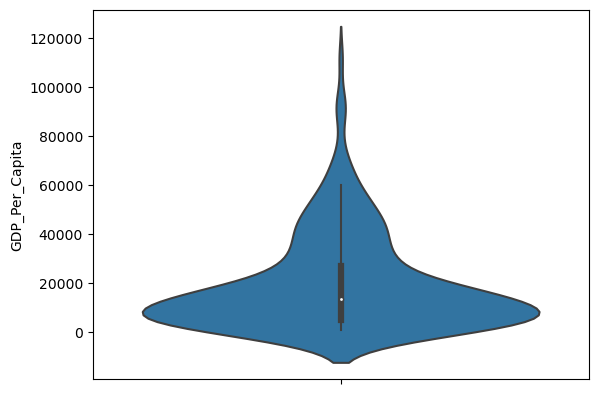

In [46]:
sns.violinplot(y=gdp_df2020["GDP_Per_Capita"])

C:\Users\elizg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


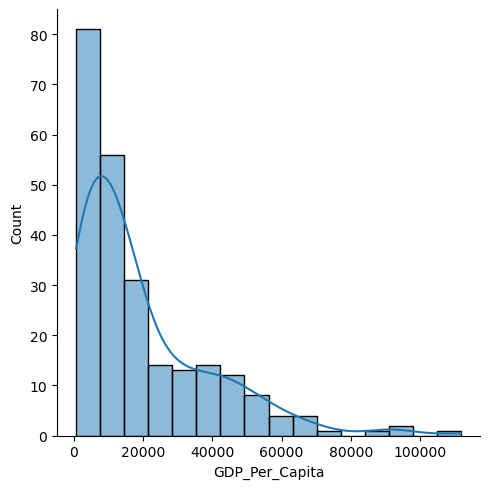

In [47]:
sns.displot(data=gdp_df2020["GDP_Per_Capita"], kde=True )

<Axes: ylabel='GDP_Per_Capita'>

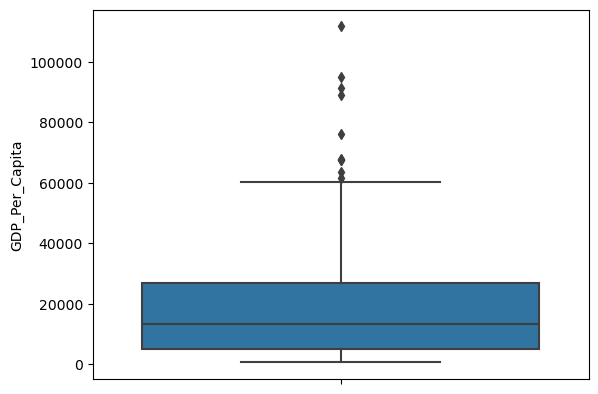

In [48]:
sns.boxplot( y=gdp_df2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

C:\Users\elizg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


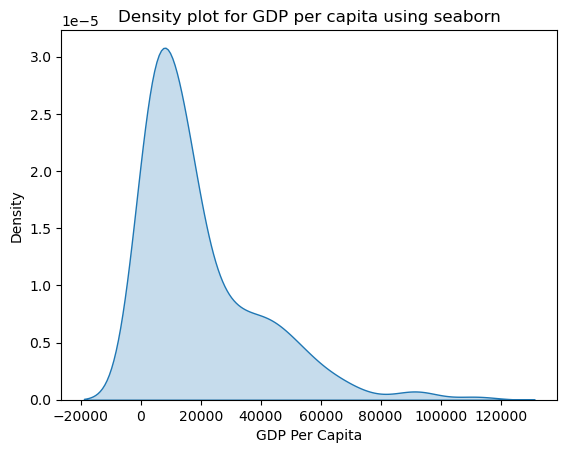

In [49]:
sns.kdeplot(data = gdp_df2020, x= 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density plot for GDP per capita using seaborn')
plt.show()

In [50]:
gdp_df2020['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [51]:
# class notes
####decades = (1990,2000,2010,2020)
###gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]

In [52]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [53]:
## to filter for this question need to make list with .isin()
## putting year dates in SQUARE BRACKET because its a parameter
## need to filter further, giving true and false response when run
## filtering data set by wrapping it in data frame

In [54]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [55]:
## class version
## my_years = [1990,2000,2010,2020]
## can also do gdp_df['Year'].isin(my_years)

In [56]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

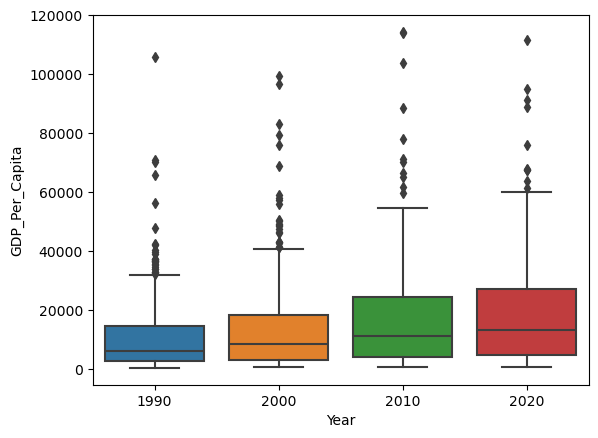

In [57]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data= gdp_decades)


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

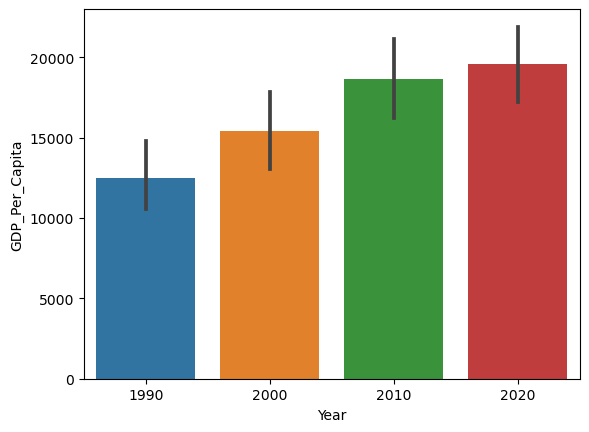

In [58]:
sns.barplot(data = gdp_decades,
                  x = 'Year',
                y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

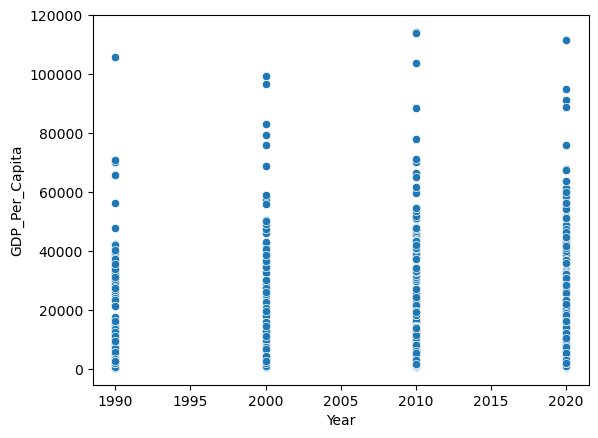

In [59]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

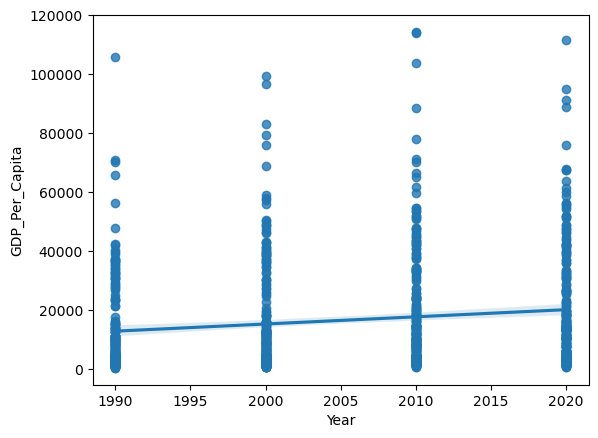

In [60]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

In [61]:
### class notes ---- gdp_df.year AND gdp_df['Year'] IS THE SAME. AVOID just using dot notation for now, easier to understand in brackets

11. Which country was the first to have a GDP per capita greater than $100,000?

In [62]:
## putting GDP_df on the outside of bracket- wrapping inside gdp_df to go inside tht data, go to column gdp capita, when greater then 100,000 then sort by YEARS to see what year and what COUNTRY

In [63]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [64]:
gdp_df[gdp_df['Year']==2020].nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744


In [65]:
## using nlargest pulling largest # and within paraenthesis, grabbing the top number, can use a different number to represent how many rows you want pulled
## using .max() function would only pull the number, not the country/ row it comes from. SO yes, would give us partially correct answer

In [66]:
## pulling 5 rows

In [67]:
## now that we know luxemboug is top GDP, going to rename into new DF top_country

In [68]:
top_country=gdp_df[gdp_df['Country'] =='Luxembourg']

In [69]:
top_country

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. *

In [80]:
gdp_df[gdp_df['Year']==2020].nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [81]:
bottom_country=gdp_df[gdp_df['Country'] =='Burundi']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

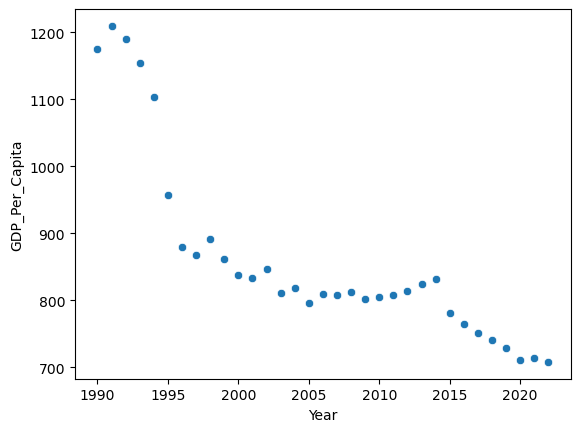

In [82]:
sns.scatterplot(x=bottom_country["Year"], y=bottom_country["GDP_Per_Capita"])

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [ ]:
## opening up internet_use into excel to explore data and see issue. Recieving ParserError in read_csv() when importing the data normally, when opened in excel, we're able to see that afer 6083 row, the data changes, we only specifically want the years for the countries, do not import the footnotes, nrows= is communicating how many rows of the data to pull. nrows= will pull any number so need to make sure it is correct

In [ ]:
internet_df= pd.read_csv('../data/internet_use.csv', nrows=6083)

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [ ]:
internet_df=internet_df.drop(columns='Value Footnotes')

In [ ]:
internet_df=internet_df.rename(columns={'Country or Area':'Country','Year':'Year', 'Value':'Internet_Users_Pct'})


In [ ]:
internet_df

16. Look at the number of observations in this dataset per year. What do you notice?

In [ ]:
##internet_df.info()

In [ ]:
##internet_df['Year'].nunique()

In [ ]:
##internet_df['Year'].sort_values().unique().tolist()

In [ ]:
##internet_df.groupby('Country')['Year'].describe()

In [ ]:
internet_df.nunique()

In [ ]:
internet_df['Year'].value_counts()

17. What is the first year to have a non-zero internet users percentage value?

In [ ]:
##internet_df[internet_df['Year'].nlargest(5, 'GDP_Per_Capita')

In [ ]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values('Year')

In [ ]:
## sabrinas code below

In [ ]:
internet_df.sort_values(['Year', 'Internet_Users_Pct'], ascending=[True, False])

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [ ]:
internet_2000=internet_df[internet_df['Year'] == 2000]

In [ ]:
type(internet_2000)

In [ ]:
internet_2000['Internet_Users_Pct'].median()

In [ ]:
internet_2014=internet_df[internet_df['Year'] == 2014]

In [ ]:
internet_2014['Internet_Users_Pct'].median()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
internet_df[internet_df['Internet_Users_Pct']<5].sort_values('Country')

In [ ]:
### answer is in rows, but also should use count

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [ ]:
gdp_df.dtypes

In [ ]:
internet_df.dtypes

In [ ]:
gdp_and_internet_use=pd.merge(internet_df,gdp_df, on = ['Country','Year'], how='outer')

In [ ]:
gdp_and_internet_use

21. Find the three countries with the highest internet users percentage in 2014.

In [ ]:
##gp_int2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [ ]:
##gp_int2014

In [ ]:
##gp_int2014[gdp_int2014['Year'].nlargest(3, 'Internet_Users_Pct')

In [ ]:
gdp_and_internet_use[gdp_and_internet_use['Year']==2014].nlargest(3, 'Internet_Users_Pct')

In [ ]:
sns.FacetGrid(gdp_and_internet_use, col="Country", row="Internet_Users_Pct")

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [ ]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.